In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("combined_gujarat_airindia_plane_crashes.csv", parse_dates=['Date'])

In [3]:
# Feature Engineering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [4]:
# Data Cleaning
df['Cause'] = df['Cause'].fillna('Unknown').str.title()
df['Weather'] = df['Weather'].fillna('Clear').str.title()
df['Fatalities'] = df['Fatalities'].fillna(0).astype(int)
df['Injuries'] = df['Injuries'].fillna(0).astype(int)
df['Is_Fatal'] = df['Fatalities'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
# Encoding for ML (categorical -> numeric)
df_encoded = pd.get_dummies(df, columns=[
    'Airline', 'Aircraft_Type', 'Cause', 'Weather', 'Flight_Phase'
], drop_first=True)

In [6]:
# Save Cleaned Data
df.to_csv("gujarat_airindia_plane_crashes_working_model.csv", index=False)

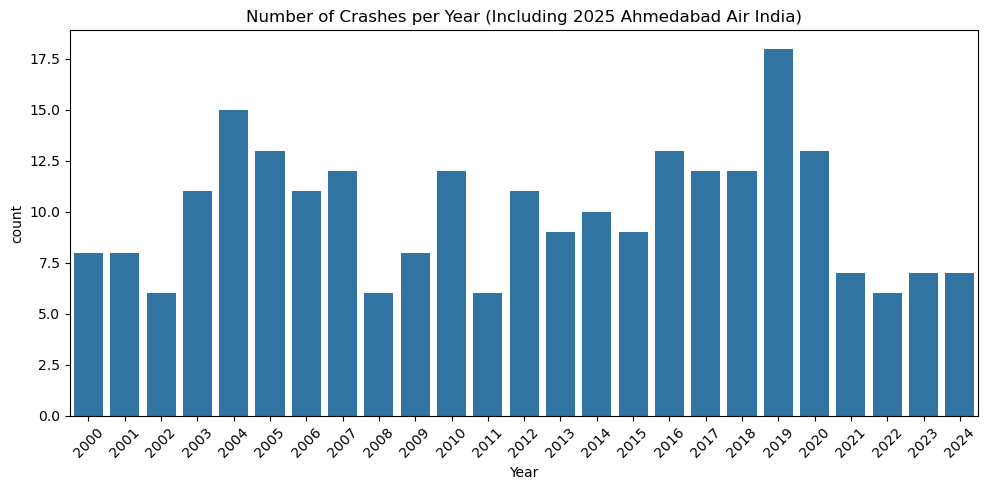

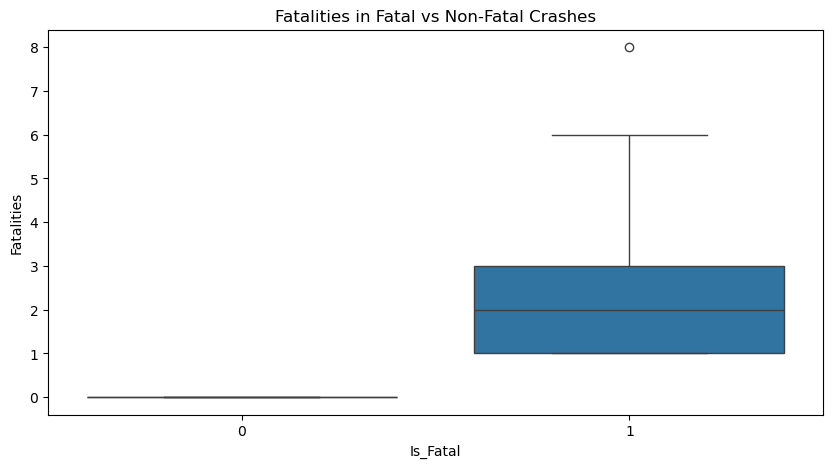

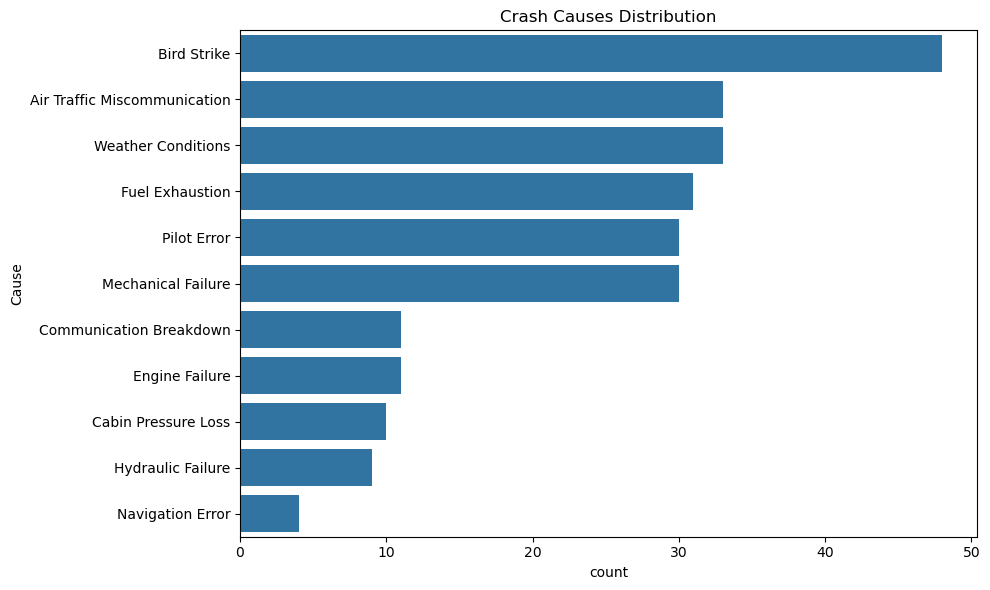

In [7]:
# Visuals
plt.figure(figsize=(10, 5))
sns.countplot(x='Year', data=df)
plt.title('Number of Crashes per Year (Including 2025 Ahmedabad Air India)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("crashes_per_year.png")

plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Fatal', y='Fatalities', data=df)
plt.title('Fatalities in Fatal vs Non-Fatal Crashes')
plt.savefig("fatalities_distribution.png")

plt.figure(figsize=(10, 6))
sns.countplot(y='Cause', data=df, order=df['Cause'].value_counts().index)
plt.title('Crash Causes Distribution')
plt.tight_layout()
plt.savefig("crash_causes_distribution.png")

In [8]:
# Modeling
df_encoded = pd.get_dummies(df, columns=['Airline', 'Aircraft_Type', 'Cause', 'Weather', 'Flight_Phase'], drop_first=True)
df_encoded.drop(columns=['Date', 'Location'], inplace=True)
X = df_encoded.drop('Is_Fatal', axis=1)
y = df_encoded['Is_Fatal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[13  0]
 [ 0 37]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        37

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [9]:
# Summary Report
summary = df.groupby('Year').agg({
    'Fatalities': 'sum',
    'Injuries': 'sum',
    'Is_Fatal': 'sum'
})
summary.to_csv("year_wise_summary.csv")
print("\nSummary:\n", summary)


Summary:
       Fatalities  Injuries  Is_Fatal
Year                                
2000          21        25         7
2001          13        23         6
2002           9        23         5
2003          19        35        10
2004          36        37        13
2005          23        30        10
2006          21        25         8
2007          18        28        10
2008          13        10         5
2009          13        21         6
2010          18        30        10
2011          14        16         6
2012          12        31         8
2013          21        16         9
2014          19        24         9
2015          15        26         8
2016          24        40         9
2017          21        28         9
2018          19        23         8
2019          31        47        12
2020          24        33        11
2021          10        18         5
2022           7        19         3
2023          16        27         7
2024          19        23 